# CLUSTERING

**KMeans**

In [0]:
csv = "https://raw.githubusercontent.com/andybbruno/DataMining/master/kids_train_cleaned.csv?token=AI2AUE57WCSSJEDHVD3Y6SC6AXC7Q"

In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv(csv)
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,AAAP,AACP,ARAP,ARCP,CAAP,CACP,CRAP,CRCP,BYRNO,VNST,VehBCost,WarrantyCost,PurchYear,PurchMonth,PurchDay,PurchWeekDay,EngineLiters,NumCylinders,4X4,WheelDrive,NumDoors,PCA1,PCA2
0,326,1,10/25/2010,ADESA,2008.0,2.0,KIA,SPECTRA,EX,SEDAN,BLUE,AUTO,Covers,61184,KOREAN,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,5546,FL,6100.0,533,2010.0,10.0,25.0,Monday,4.11398,5.0,0,0,4.0,1797.080405,-753.566708
1,42991,0,5/27/2009,MANHEIM,2006.0,3.0,CHRYSLER,STRATUS,SXT,SEDAN,SILVER,AUTO,Covers,92383,AMERICAN,5480.0,6461.0,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,99750,FL,4000.0,1630,2009.0,5.0,27.0,Wednesday,2.70000,6.0,0,0,4.0,-4879.356480,1637.798453
2,55273,0,3/18/2010,OTHER,2008.0,2.0,CHRYSLER,CALIBER,SE,WAGON,BLACK,AUTO,Covers,45965,AMERICAN,8067.0,8580.0,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,99761,OK,7500.0,693,2010.0,3.0,18.0,Thursday,2.31289,6.0,0,0,4.0,4349.541129,-467.358818
3,29058,0,6/8/2009,OTHER,2005.0,4.0,FORD,FREESTAR,S,MINIVAN,BROWN,AUTO,Covers,80169,AMERICAN,4817.0,6658.0,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,99761,AZ,4725.0,1633,2009.0,6.0,8.0,Monday,3.90000,6.0,NO,Front,5.0,-5514.286888,1633.449461
4,34991,0,3/4/2009,MANHEIM,2005.0,4.0,CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,BLUE,AUTO,Alloy,77372,AMERICAN,5430.0,6633.0,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,20833,TX,5670.0,1623,2009.0,3.0,4.0,Wednesday,3.30000,4.0,NO,Front,5.0,-4594.389176,1693.004506


In [0]:
for e in df.columns:
  print(e)

RefId
IsBadBuy
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelType
VehOdo
Nationality
AAAP
AACP
ARAP
ARCP
CAAP
CACP
CRAP
CRCP
BYRNO
VNST
VehBCost
WarrantyCost
PurchYear
PurchMonth
PurchDay
PurchWeekDay
EngineLiters
NumCylinders
4X4
WheelDrive
NumDoors
PCA1
PCA2


In [0]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

WheelType    2575
dtype: int64

In [0]:
df_clus = df[['AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 
             'CRAP', 'CRCP', 'VehBCost', 'WarrantyCost', 'VehOdo', 'PCA1', 'PCA2']]
df_clus = df_clus[0:20000]

In [0]:
df_clus.corr()

,AAAP,AACP,ARAP,ARCP,CAAP,CACP,CRAP,CRCP,VehBCost,WarrantyCost,VehOdo,PCA1,PCA2
AAAP,1.000000,0.989878,0.903182,0.903162,0.955589,0.949137,0.886317,0.884952,0.814996,-0.059589,-0.027343,0.959632,0.222926
AACP,0.989878,1.000000,0.893702,0.910427,0.943685,0.951744,0.876935,0.887472,0.811896,-0.029827,0.015330,0.957867,0.223021
ARAP,0.903182,0.893702,1.000000,0.989452,0.866905,0.862759,0.934822,0.926125,0.776201,-0.060880,0.022826,0.965293,-0.191259
ARCP,0.903162,0.910427,0.989452,1.000000,0.864831,0.872291,0.927316,0.929899,0.780806,-0.033756,0.056427,0.967742,-0.173774
CAAP,0.955589,0.943685,0.866905,0.864831,1.000000,0.990008,0.910105,0.907197,0.788281,-0.061284,-0.039652,0.954432,0.271486
CACP,0.949137,0.951744,0.862759,0.872291,0.990008,1.000000,0.902216,0.915911,0.786274,-0.033103,0.001273,0.955854,0.271375
CRAP,0.886317,0.876935,0.934822,0.927316,0.910105,0.902216,1.000000,0.988981,0.771579,-0.060717,0.003729,0.970183,-0.105292
CRCP,0.884952,0.887472,0.926125,0.929899,0.907197,0.915911,0.988981,1.000000,0.773884,-0.033172,0.036846,0.971837,-0.086056
VehBCost,0.814996,0.811896,0.776201,0.780806,0.788281,0.786274,0.771579,0.773884,1.000000,-0.039219,-0.075337,0.814500,0.088770
WarrantyCost,-0.059589,-0.029827,-0.060880,-0.033756,-0.061284,-0.033103,-0.060717,-0.033172,-0.039219,1.000000,0.402873,-0.047319,0.003959


In [0]:
df_1 = df_clus[['VehOdo', 'VehBCost', 'AAAP']]
df_2 = df_clus[['WarrantyCost', 'VehBCost', 'AAAP']]
df_3 = df_clus[['AAAP', 'ARAP', 'VehBCost']]
df_4 = df_clus[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_5 = df_clus[['WarrantyCost', 'AAAP', 'VehOdo']]

data_frames = [df_1, df_2, df_3, df_4, df_5]

## K-Means with MinMax


In [0]:
scaler = MinMaxScaler()
z_scaled_df = []
for x in data_frames:
  z_scaled_df.append(scaler.fit_transform(x.values))

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
results = {}
for i, x in enumerate(z_scaled_df):
  results[str(i)] = []

choices_k = []
for k in range(2, 17):
  choices_k.append(k)

for i, x in enumerate(z_scaled_df):
  for k in choices_k:
    results[str(i)].append(KMeans(n_clusters=k).fit(x))
  print(i)

0
1
2
3
4


In [0]:
to_plot_idx = 3
to_plot = data_frames[to_plot_idx]
lab = []
for e in to_plot.columns:
  lab.append(e)
x = lab[0]
y = lab[1]
z = lab[2]
k_plot = 6

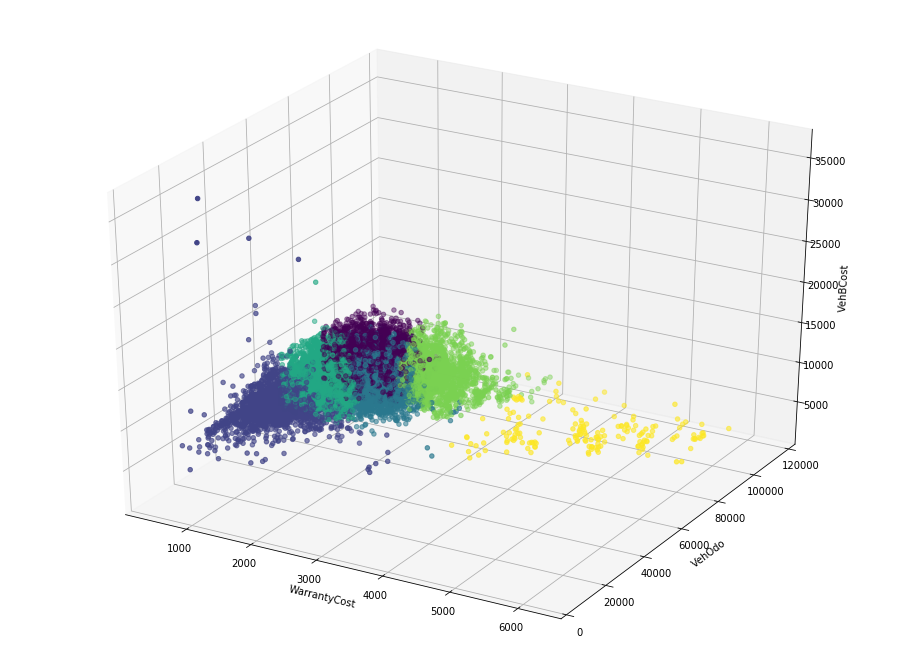

In [0]:

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=results[str(to_plot_idx)][k_plot-2].labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [0]:
fig = go.Figure(data=[go.Scatter3d(
    x=data_frames[to_plot_idx][x],
    y=data_frames[to_plot_idx][y],
    z=data_frames[to_plot_idx][z],
    mode='markers',
    marker=dict(
        size=2,
        color=results[str(to_plot_idx)][k_plot-2].labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

[[ 1080.19407245 25471.91123783 19625.86079636]
 [  855.03683342 13317.77058135 21031.09844981]
 [ 1633.42923314 21341.86919749 22626.8292264 ]
 [  924.69624573 19341.7233108  20577.4570027 ]
 [ 2058.58378574 25947.02827711 20136.21183086]
 [ 4678.66101695 22958.12907763 15892.96268536]]


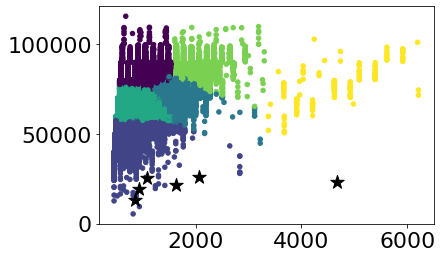

In [0]:
res = results[str(to_plot_idx)][k_plot-2]
centers = scaler.inverse_transform(res.cluster_centers_)
print(centers)

plt.scatter(df_clus['WarrantyCost'], df_clus['VehOdo'], c=res.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()


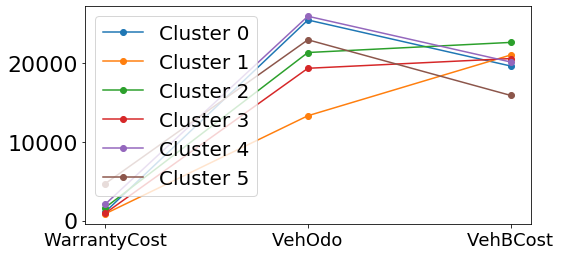

In [0]:
plt.figure(figsize=(8, 4))
col = data_frames[to_plot_idx].columns
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(col)), col, fontsize=18)
plt.legend(fontsize=20)
plt.show()

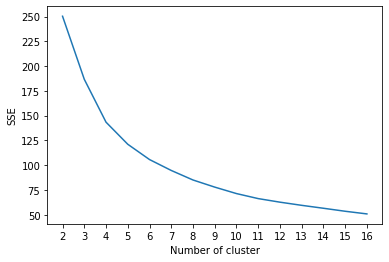

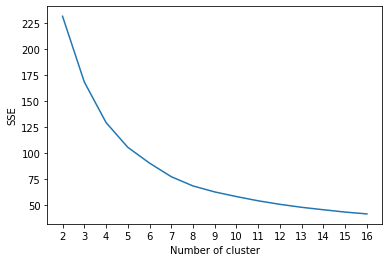

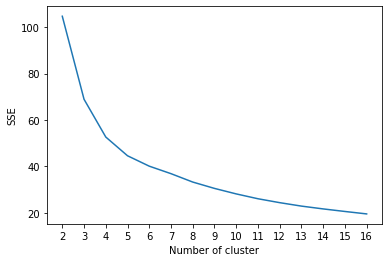

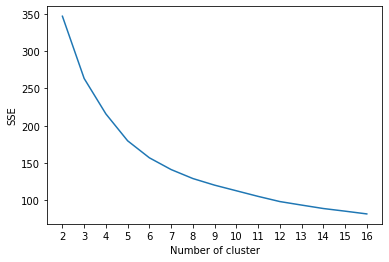

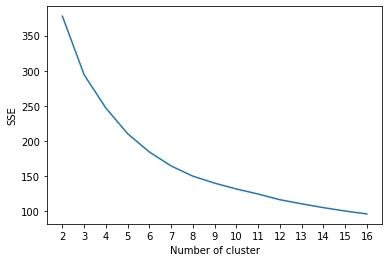

In [0]:
sse = {}

for i, e in enumerate(z_scaled_df):
  sse[str(i)] = {}

for i, e in enumerate(z_scaled_df):
  for k in choices_k:
      sse[str(i)][str(k)] = results[str(i)][k - 2].inertia_# Inertia: Sum of distances of samples to their closest cluster center
  plt.figure()

  plt.plot(list(sse[str(i)].keys()), list(sse[str(i)].values()))

  plt.xlabel("Number of cluster")

  plt.ylabel("SSE")

  plt.show()

In [0]:
silu = {}

for idx, e in enumerate(z_scaled_df):
  silu[str(idx)] = []

for idx, e in enumerate(z_scaled_df):
  for i in range(5, 7):
    silu[str(idx)].append(silhouette_score(z_scaled_df[idx], results[str(idx)][i-2].labels_, metric = 'euclidean'))
  print("end data frame ", idx)

end data frame  0
end data frame  1
end data frame  2
end data frame  3
end data frame  4


In [0]:
print(sse['0']['2'])
print(round(sse['0']['2']))

250.31121534444515
250.0


In [0]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['','<b>k = 5 => <SSE, Silohuette></b>','<b>k = 6 => <SSE, Silohuette></b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['DF1', 'DF2', 'DF3', 'DF4', 'DF5'],
      ["<" + str(round(sse['0']['5'])) + ", %.3f" % silu['0'][0] + ">",
       "<" + str(round(sse['1']['5'])) + ", %.3f" % silu['1'][0] + ">",
       "<" + str(round(sse['2']['5'])) + ", %.3f" % silu['2'][0] + ">",
       "<" + str(round(sse['3']['5'])) + ", %.3f" % silu['3'][0] + ">",
       "<" + str(round(sse['4']['5'])) + ", %.3f" % silu['4'][0] + ">",],
      ["<" + str(round(sse['0']['6'])) + ", %.3f" % silu['0'][1] + ">",
       "<" + str(round(sse['1']['6'])) + ", %.3f" % silu['1'][1] + ">",
       "<" + str(round(sse['2']['6'])) + ", %.3f" % silu['2'][1] + ">",
       "<" + str(round(sse['3']['6'])) + ", %.3f" % silu['3'][1] + ">",
       "<" + str(round(sse['4']['6'])) + ", %.3f" % silu['4'][1] + ">",]],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()